## Module과 Data 불러오기

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor

In [2]:
test_df = pd.read_csv('./data/test.csv')
train_df = pd.read_csv('./data/train.csv')
sample_submission_df = pd.read_csv('./data/sample_submission.csv')

## Train Data와 Test Data 확인

In [8]:
print(test_df.shape)
test_df.head()

(2924, 9)


,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
0,1,F,0.595,0.470,0.155,1.121,0.4515,0.1780,0.1550
1,2,M,0.580,0.450,0.150,0.927,0.2760,0.1815,0.3600
2,3,I,0.260,0.205,0.070,0.097,0.0415,0.0190,0.0305
3,4,M,0.590,0.460,0.130,1.102,0.4550,0.2055,0.3300
4,5,F,0.595,0.465,0.140,1.113,0.5175,0.2440,0.3050


In [9]:
print(train_df.shape)
train_df.head()

(1253, 10)


,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,2,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,3,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,4,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,5,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


## 결측치 유무 확인

In [10]:
def check_null(df):    
    total_cnt = 0
    for i in df.columns:
        cnt = sum(df[i].isnull())
        total_cnt += cnt
        if cnt:
            print(f'{i}열에 결측치{cnt}개')
        else:
            print(f'{i}열에 결측치 없음')
    if total_cnt == 0:
        print('모든 열에 결측치 없음')
    else:
        print(f'총 결측치 {total_cnt}개')

In [11]:
check_null(test_df)

id열에 결측치 없음
Gender열에 결측치 없음
Lenght열에 결측치 없음
Diameter열에 결측치 없음
Height열에 결측치 없음
Whole Weight열에 결측치 없음
Shucked Weight열에 결측치 없음
Viscra Weight열에 결측치 없음
Shell Weight열에 결측치 없음
모든열에 결측치 없음


In [12]:
check_null(train_df)

id열에 결측치 없음
Gender열에 결측치 없음
Lenght열에 결측치 없음
Diameter열에 결측치 없음
Height열에 결측치 없음
Whole Weight열에 결측치 없음
Shucked Weight열에 결측치 없음
Viscra Weight열에 결측치 없음
Shell Weight열에 결측치 없음
Target열에 결측치 없음
모든열에 결측치 없음


## 'id' column 제거

In [13]:
train_df = train_df.drop(columns='id')
test_df = test_df.drop(columns='id')
train_df.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


## 'Target' 분석

In [15]:
train_df.groupby('Target').count().iloc[:,0]

Target
3       5
4      14
5      37
6      88
7     107
8     174
9     200
10    202
11    141
12     79
13     62
14     42
15     26
16     21
17     13
18     12
19      8
20     11
21      5
22      2
23      3
29      1
Name: Gender, dtype: int64

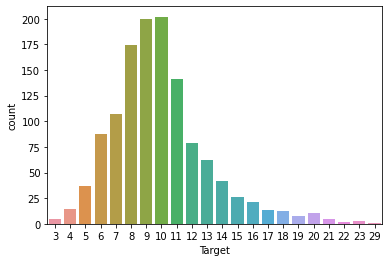

In [16]:
sns.countplot(train_df['Target'])
plt.show()

## 'Gender' 분석

In [17]:
train_df.groupby('Gender').count().iloc[:,0]

Gender
F    380
I    404
M    469
Name: Lenght, dtype: int64

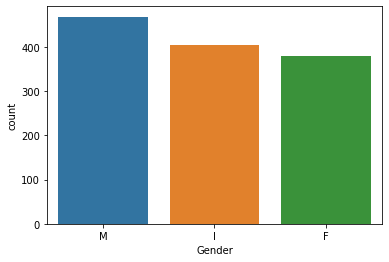

In [18]:
sns.countplot(train_df['Gender'])
plt.show()